In [148]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np



def KmeansSeg(image,K):
    
    Z = image.reshape((-1,3))

    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 1.0)
    
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_PP_CENTERS)
    #print(ret)
    #print(label)
    #print(center)
    
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((image.shape))
    
    return res2,ret,label,center


#Image processing tools

def GetImageFromFileCV(filename):
    image = cv2.imread(filename)
    return image    



def ResizeImgCV(image,size):
    image = np.asarray(cv2.resize(image,size))
    return image  

def PltImg(image):
    plt.imshow(image)
    plt.show()

def ColorDistribution2(image):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        modified_img = image.reshape(image.shape[0]*image.shape[1], 3)
        hexcolorlist=[]
        for i in range(len(modified_img)):
            #去掉黑色
            if (rgb_to_hex(modified_img[i]) != "#000000"):
                hexcolorlist.append(rgb_to_hex(modified_img[i]))

        unique,counts=np.unique(hexcolorlist,return_counts=True)

        return (unique,counts)

def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        num = int(i)
        #hex_color += ("{:02x}".format(i))
        hex_color += str(hex(num))[-2:].replace("x","0").upper()
    return hex_color


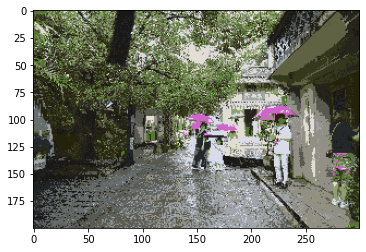

<BarContainer object of 24 artists>

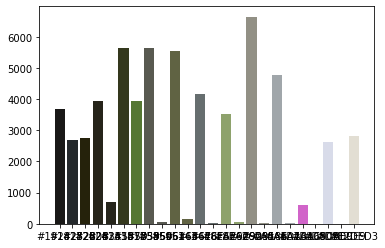

In [3]:
#-------------------------------------------------HSV method ----------------------------------------------

image = GetImageFromFileCV("E:\\Downloads\\gluonCV\\test\\2L7A0030.JPG")
image = ResizeImgCV(image,(300,200))

image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

#bgr to rgb

(res2,_,_,_)=KmeansSeg(image,15)

res2=cv2.cvtColor(res2,cv2.COLOR_HSV2BGR)

PltImg(res2[:,:,::-1])

#plot graph
res2 = res2
(unique,counts)=ColorDistribution2(res2)
plt.figure(figsize = (6, 4))
plt.bar(unique,counts,color = unique)

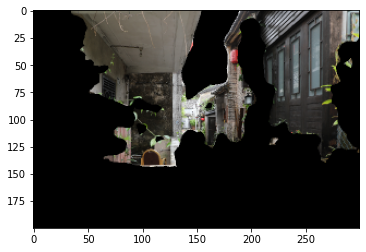

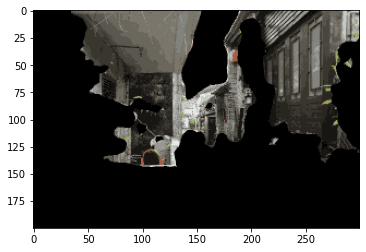

<BarContainer object of 14 artists>

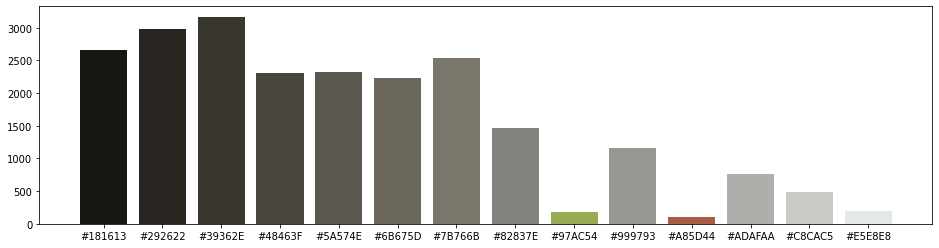

In [156]:
#-------------------------------------------------RGBMethod----------------------------------------------

image = GetImageFromFileCV("E:\\Downloads\\gluonCV\\test\\2L7A0096masked.png")
image = ResizeImgCV(image,(300,200))


#bgr to rgb
image=image[:,:,::-1]
(res2,_,_,_)=KmeansSeg(image,15)


PltImg(image)
PltImg(res2)

#plot graph
res2 = res2[:,:,::-1]
(unique,counts)=ColorDistribution2(res2)
plt.figure(figsize = (16, 4))
plt.bar(unique,counts,color = unique)

In [153]:
#-------------------------------------------------Multi-Iteration Method----------------------------------------------
def test1():
    image = GetImageFromFileCV("E:\\Downloads\\gluonCV\\test\\2L7A0096masked.png")
    image = ResizeImgCV(image,(300,200))

    Klist=[200,15]
    
    #1st kmeans
    #PltImg(image[:,:,::-1])

    #reshape 
   
    result = image.reshape(-1,1,3)
   
    for i in Klist:
        #kmeans
        (result,_,_,_)=KmeansSeg(result,i)
        #unique
        result=np.unique(result,axis=0)
        print("------------------"+ str(i) +"------------------------")
        print(result.shape)





    #result=result.reshape(1,-1,3)

    """
    plt.figure(figsize = (6, 4))
    a=np.array([10]*result.shape[0])
    plt.bar(result,a,color = result)
    """

    #PltImg(image)

    #plot graph
    (unique,counts)=ColorDistribution2(result)
    plt.figure(figsize = (10, 2))
    plt.bar(unique,counts,color = unique)
    plt.show()


------------------200------------------------
(200, 1, 3)
------------------15------------------------
(15, 1, 3)


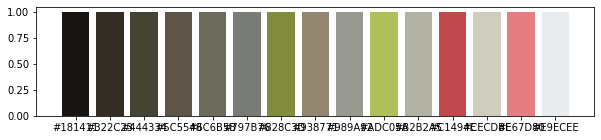

------------------200------------------------
(200, 1, 3)
------------------15------------------------
(15, 1, 3)


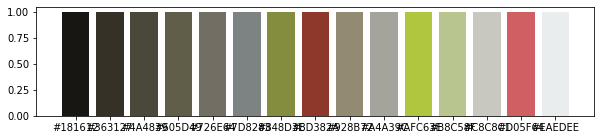

------------------200------------------------
(200, 1, 3)
------------------15------------------------
(15, 1, 3)


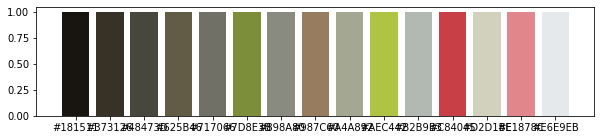

In [154]:
for i in range(1,4):
    test1()

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility

image = GetImageFromFileCV("E:\\Downloads\\gluonCV\\test\\2L7A0030.JPG")
image = ResizeImgCV(image,(30,20))


fig = plt.figure()
plt.figure(figsize = (10, 4))
ax = fig.add_subplot(projection='3d')
image = image.reshape(-1,3)
for element in image:
    ax.scatter(element[0],element[1],element[2])


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# for creating a responsive plot
%matplotlib notebook
  
# importing required libraries
import numpy as np  
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating random dataset
x = np.linspace(0,4*np.pi,1000)
y = np.sin(x) 
z = 15 * np.random.random(1000)
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
  
# creating the plot
plot_scatter = ax.scatter(x, y, z,color='r')
  
# setting title and labels
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
  
# displaying the plot
plt.show()

<IPython.core.display.Javascript object>

c:\ProgramData\Anaconda3\envs\gluonPy\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()
